In [1]:
#导入包
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#导入数据
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(r'C:\Users\Administrator\Desktop\LSTM\shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

C:\software\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=349.117636, expected=342.300000
predicted=306.513009, expected=339.700000
predicted=387.376444, expected=440.400000
predicted=348.154210, expected=315.900000
predicted=386.308831, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379510, expected=437.400000
predicted=394.737284, expected=575.500000
predicted=434.915498, expected=407.600000
predicted=507.923383, expected=682.000000
predicted=435.482720, expected=475.300000
predicted=652.743779, expected=581.300000
predicted=546.343458, expected=646.900000
Test MSE: 6958.328


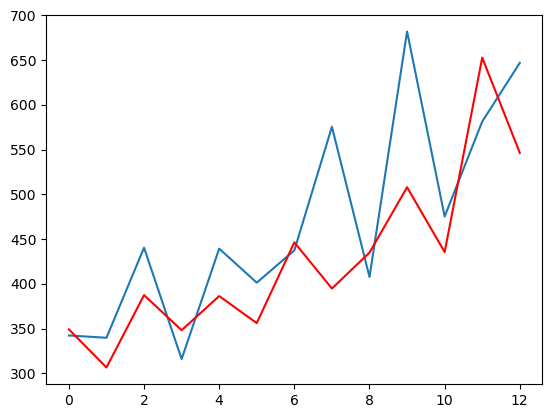

In [3]:
x = series.values
size = int(len(x) * 0.66)
train, test = x[0:size], x[size:len(x)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()